In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [15]:
df_s20 = pd.read_csv('Project/data_s20.csv')
df_s18 = pd.read_csv('Project/data_s18.csv')
df_ei = pd.read_csv('Project/data_eachIter.csv')
df_s20['strategy'] = 1
df_s18['strategy'] = 2
df_ei['strategy'] = 3

In [16]:
e20_64_df_s20 = df_s20.query('num_epochs == 20 & bs == 64 & num_nodes < 16')
e20_64_df_s18 = df_s18.query('num_epochs == 20 & bs == 64 & num_nodes < 16')
e20_50_df_ei = df_ei.query('num_epochs == 20 & bs == 50 & num_nodes < 16')
comb1 = [e20_64_df_s20, e20_64_df_s18, e20_50_df_ei]
comb20_64 = pd.concat(comb1, ignore_index=True)

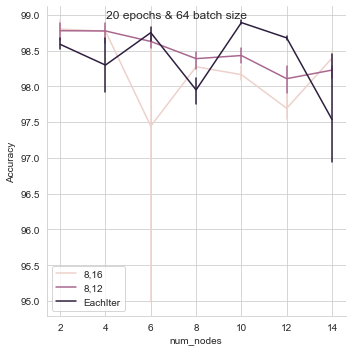

In [19]:
comb20_64 = pd.concat(comb1, ignore_index=True)
seaborn.set_style("whitegrid")
g1 = seaborn.relplot(data=comb20_64, x='num_nodes', y='acc', hue='strategy', kind="line", legend=False, err_style="bars")
g1.fig.suptitle("20 epochs & 64 batch size", y=0.96)
g1.set(ylabel="Accuracy", xlabel="num_nodes")
plt.legend(labels=["8,16", "8,12", "EachIter"])
plt.savefig('s18_s20_ei.png')
plt.show()